# First Look at Retractions Data


## Preliminary Inspection


- Importing the required libraries and loading the data:

In [12]:

# Import required libraries

import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import re

In [29]:

# Read data from .csv file 

df = pd.read_csv('retractions.csv', encoding='latin-1')

# Display header

df.tail()


,Record ID,Title,Subject,Institution,Journal,Publisher,Country,Author,URLS,ArticleType,RetractionDate,RetractionDOI,RetractionPubMedID,OriginalPaperDate,OriginalPaperDOI,OriginalPaperPubMedID,RetractionNature,Reason,Paywalled,Notes
52285,5,Effect of Perindopril on Large Artery Stiffnes...,(BLS) Biochemistry;(HSC) Medicine - Cardiology...,"Alfred and Baker Medical Unit, Baker Heart Res...",JAMA: Journal of the American Medical Association,American Medical Association,Australia,Anna A Ahimastos;Anuradha Aggarwal;Kellie M D'...,http://retractionwatch.com/2015/11/23/jama-ret...,Clinical Study;Research Article;,12/22/2015 0:00,10.1001/jama.2015.16678,26594834.0,10/3/2007 0:00,10.1001/jama.298.13.1539,1791149.0,Retraction,+Falsification/Fabrication of Data;+Investigat...,No,NaN
52286,4,MtvR is a global small noncoding regulatory RN...,(BLS) Biology - Cellular;(BLS) Genetics;(BLS) ...,Institute for Biotechnology and Bioengineering...,Journal of Bacteriology,American Society for Microbiology,Portugal,Christian G Ramos;AndrÃ© M Grilo;Paulo J P da ...,http://retractionwatch.com/2014/11/03/post-doc...,Research Article;,11/1/2014 0:00,10.1128/JB.02299-14,25319527.0,5/31/2013 0:00,10.1128/JB.00242-13,2372964.0,Retraction,+Duplication of Image;+Manipulation of Images;,No,exact date of retraction unknown
52287,3,"The second RNA chaperone, Hfq2, is also requir...",(BLS) Biology - Cellular;(BLS) Genetics;(BLS) ...,IBBâInstitute for Biotechnology and Bioengin...,Journal of Bacteriology,American Society for Microbiology,Portugal,Christian G Ramos;SÃ­lvia A Sousa;AndrÃ© M Gri...,http://retractionwatch.com/2014/10/17/this-sit...,Research Article;,11/1/2014 0:00,10.1128/JB.02242-14,25319526.0,1/28/2011 0:00,10.1128/JB.01375-10,21278292.0,Retraction,+Duplication of Image;+Error in Image;,No,NaN
52288,2,Regulation of Wnt/beta-catenin pathway by cPLA...,(BLS) Biology - Cancer;(BLS) Biology - Cellula...,"Department of Pathology, University of Pittsbu...",Journal of Cellular Biochemistry,Wiley,United States,Chang Han;Kyu Lim;Lihong Xu;Guiying Li;Tong Wu,http://retractionwatch.com/2015/02/09/figure-d...,Research Article;,1/29/2015 0:00,10.1002/jcb.25020,25767853.0,7/17/2008 0:00,10.1002/jcb.21852,18636547.0,Retraction,+Duplication of Image;+Falsification/Fabricati...,No,NaN
52289,1,Genistein protects genioglossus myocyte agains...,(BLS) Biology - Cellular;(BLS) Biology - Molec...,"Tongji University, Shanghai, Shanghai Shi, China",Journal of Cellular Biochemistry,Wiley,China,Wanghui Ding;Yuehua Liu,NaN,Research Article;,3/15/2012 0:00,10.1002/jcb.23190,21598307.0,5/19/2011 0:00,10.1002/jcb.23190,0.0,Retraction,+Investigation by Third Party;+Withdrawal;,No,NaN


- Obtaining fasic information about the data frame:

In [4]:

# Display info on data type and non-null entries per column

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52290 entries, 0 to 52289
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Record ID              52290 non-null  int64  
 1   Title                  52290 non-null  object 
 2   Subject                52290 non-null  object 
 3   Institution            52289 non-null  object 
 4   Journal                52290 non-null  object 
 5   Publisher              52290 non-null  object 
 6   Country                52290 non-null  object 
 7   Author                 52290 non-null  object 
 8   URLS                   28504 non-null  object 
 9   ArticleType            52290 non-null  object 
 10  RetractionDate         52290 non-null  object 
 11  RetractionDOI          51788 non-null  object 
 12  RetractionPubMedID     47117 non-null  float64
 13  OriginalPaperDate      52290 non-null  object 
 14  OriginalPaperDOI       49751 non-null  object 
 15  Or

In [7]:
df.describe()

,Record ID,RetractionPubMedID,OriginalPaperPubMedID
count,52290.000000,4.711700e+04,4.714200e+04
mean,26380.195525,1.460082e+07,1.297306e+07
std,15176.678195,1.608613e+07,1.432115e+07
min,1.000000,0.000000e+00,0.000000e+00
25%,13258.250000,0.000000e+00,0.000000e+00
50%,26392.500000,0.000000e+00,0.000000e+00
75%,39518.750000,3.248437e+07,2.767767e+07
max,52765.000000,3.847989e+07,3.836047e+07


In [22]:
df.shape

(52290, 20)

In [30]:
# Define the function to format column names
def format_column_name(name):
    # Insert an underscore before each capital letter
    formatted_name = re.sub(r'(?<!^)(?=[A-Z])', '_', name)
    # Special handling for 'ID' and 'DOI' to avoid splitting them
    formatted_name = formatted_name.replace('_I_D', '_id').replace('_D_O_I', 'doi').replace('U_R_L_S', 'urls')
    # Convert the entire string to lowercase
    formatted_name = formatted_name.lower()
    return formatted_name

# Format and replace each column name
df.columns = [format_column_name(column) for column in df.columns]

df.head(5)

,record _id,title,subject,institution,journal,publisher,country,author,urls,article_type,retraction_date,retractiondoi,retraction_pub_med_id,original_paper_date,original_paperdoi,original_paper_pub_med_id,retraction_nature,reason,paywalled,notes
0,52765,An integrated 3D model based face recognition ...,(B/T) Data Science;(B/T) Technology;,"Management Information System Department, Cypr...",Applied Nanoscience,Springer,Turkey,Ali Milad;Kamil Yurtkan,https://retractionwatch.com/2024/01/26/springe...,Research Article;,6/30/2023 0:00,10.1007/s13204-024-03010-9,0.0,2/3/2022 0:00,10.1007/s13204-021-02123-9,0.0,Correction,+Error in Text;+Updated to Retraction;,No,See also: https://pubpeer.com/publications/BCC...
1,52762,Convolutional neural network and Kalman filter...,(B/T) Data Science;(B/T) Technology;(PHY) Engi...,"Engineering Campus, School of Electrical and E...",Applied Nanoscience,Springer,Malaysia,Bushra N Alsunbuli;Widad Ismail;Nor M Mahyuddin,https://retractionwatch.com/2024/01/26/springe...,Research Article;,1/11/2024 0:00,10.1007/s13204-024-03006-5,0.0,9/17/2021 0:00,10.1007/s13204-021-02043-8,0.0,Retraction,+Concerns/Issues about Referencing/Attribution...,No,See also: https://pubpeer.com/publications/83D...
2,52761,Provide a new framework for blockchain-based i...,(B/T) Technology;,"Electrical and Computer Engineering, Altinbas ...",Applied Nanoscience,Springer,Turkey,Firas Hammoodi Neanah Al-mutar;Abdullahi Abdu ...,https://retractionwatch.com/2024/01/26/springe...,Research Article;,1/10/2024 0:00,10.1007/s13204-024-03023-4,0.0,2/3/2022 0:00,10.1007/s13204-021-02175-x,0.0,Retraction,+Concerns/Issues about Referencing/Attribution...,No,See also: https://pubpeer.com/publications/B48...
3,52760,Integration of Healthcare 4.0 and blockchain i...,(B/T) Technology;(HSC) Medicine - General;(HSC...,"Godwit Technologies, Pune, India; Business Inf...",Applied Nanoscience,Springer,India;Iraq;Turkey,Hemant B Mahajan;Ameer Sardar Rashid;Aparna A ...,NaN,Research Article;,1/14/2024 0:00,10.1007/s13204-024-03007-4,0.0,2/4/2022 0:00,10.1007/s13204-021-02164-0,35136707.0,Retraction,+Concerns/Issues about Referencing/Attribution...,No,See also: https://pubpeer.com/publications/347...
4,52759,A framework for adopting gamified learning sys...,(B/T) Technology;(SOC) Education;,Department of Electrical and Computer Engineer...,Applied Nanoscience,Springer,Turkey,Farazdaq Nahedh Alsamawi;Sefer Kurnaz,https://retractionwatch.com/2024/01/26/springe...,Research Article;,1/11/2024 0:00,10.1007/s13204-024-03028-z,0.0,6/16/2021 0:00,10.1007/s13204-021-01909-1,34155468.0,Retraction,+Concerns/Issues about Referencing/Attribution...,No,See also: https://pubpeer.com/publications/F2E...


- Quick NaN analysis:

<Axes: >

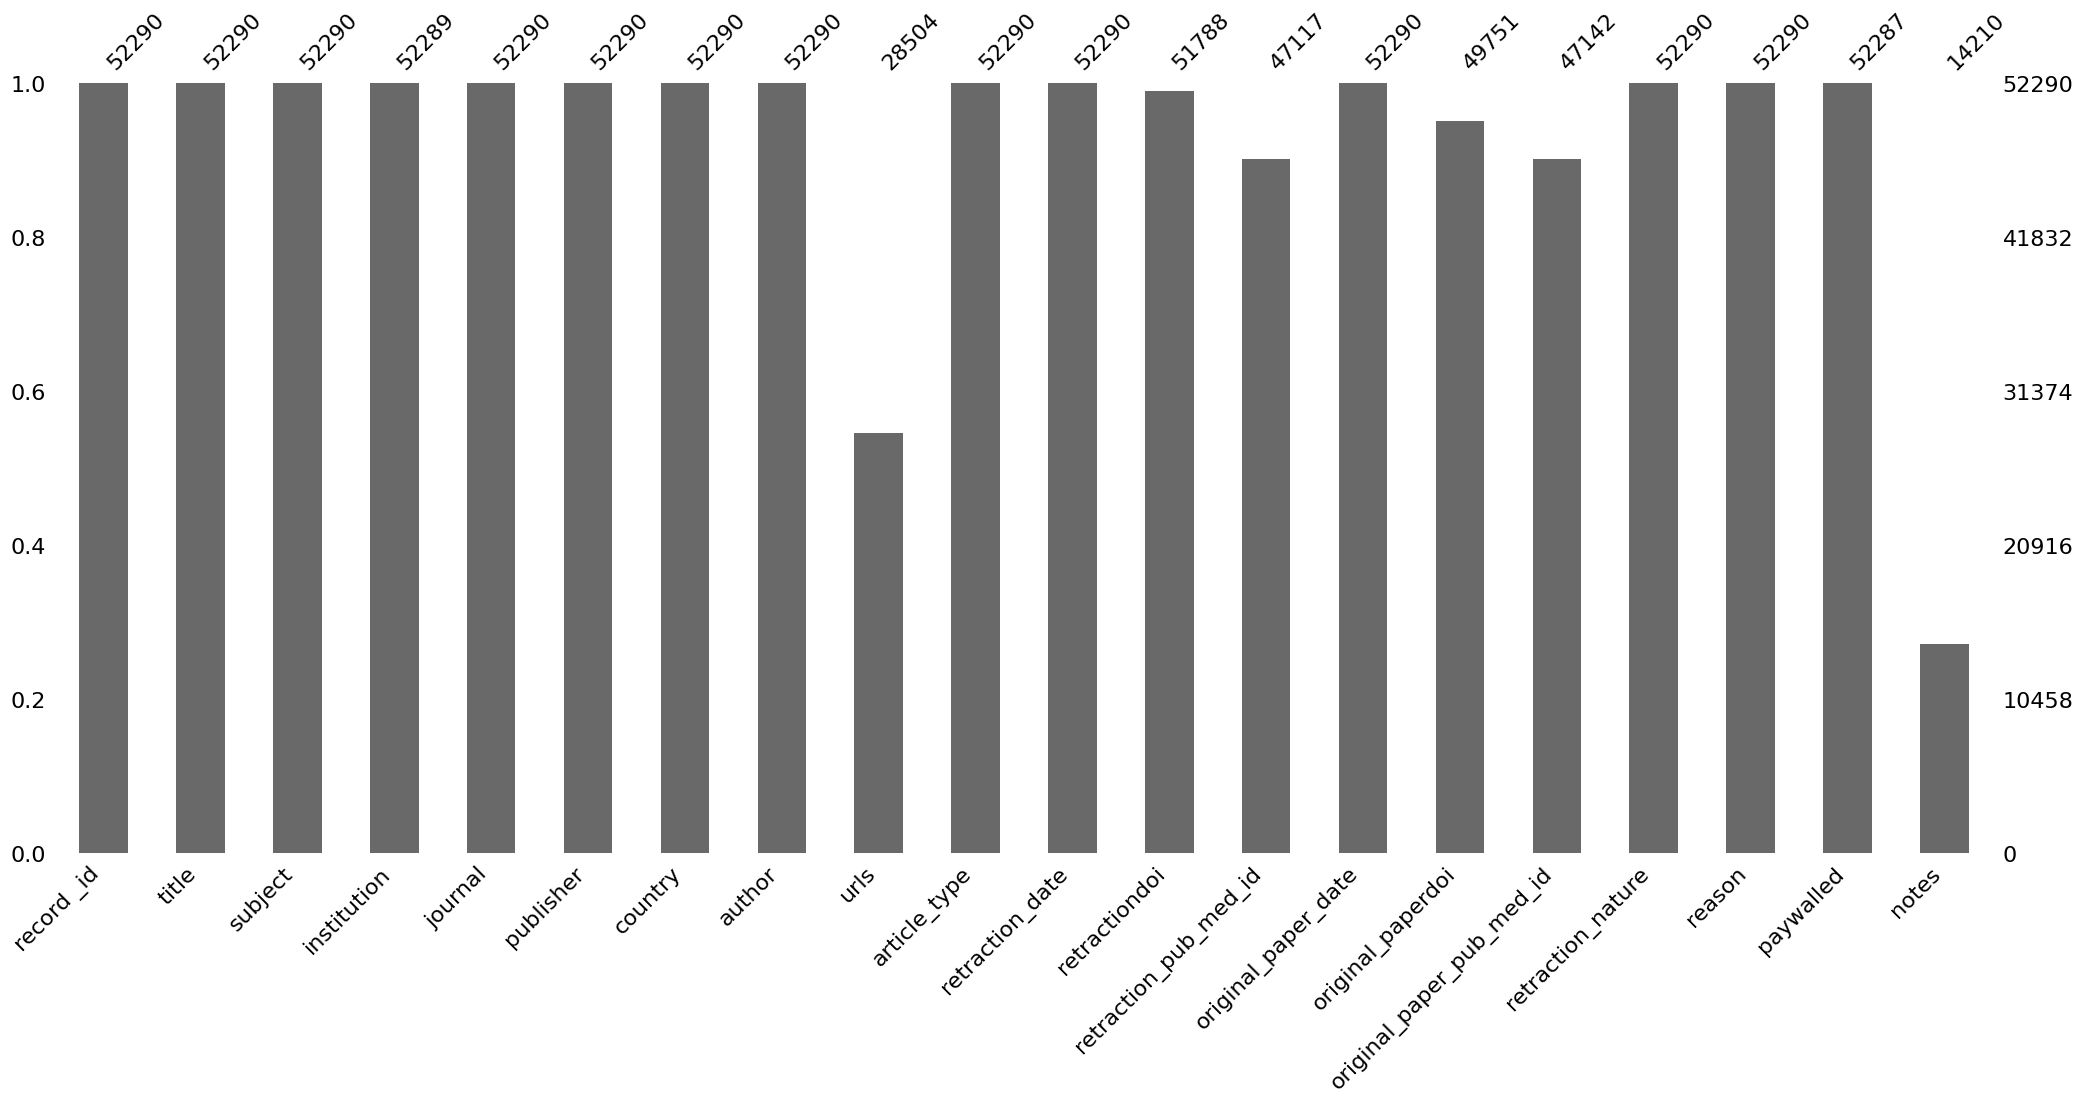

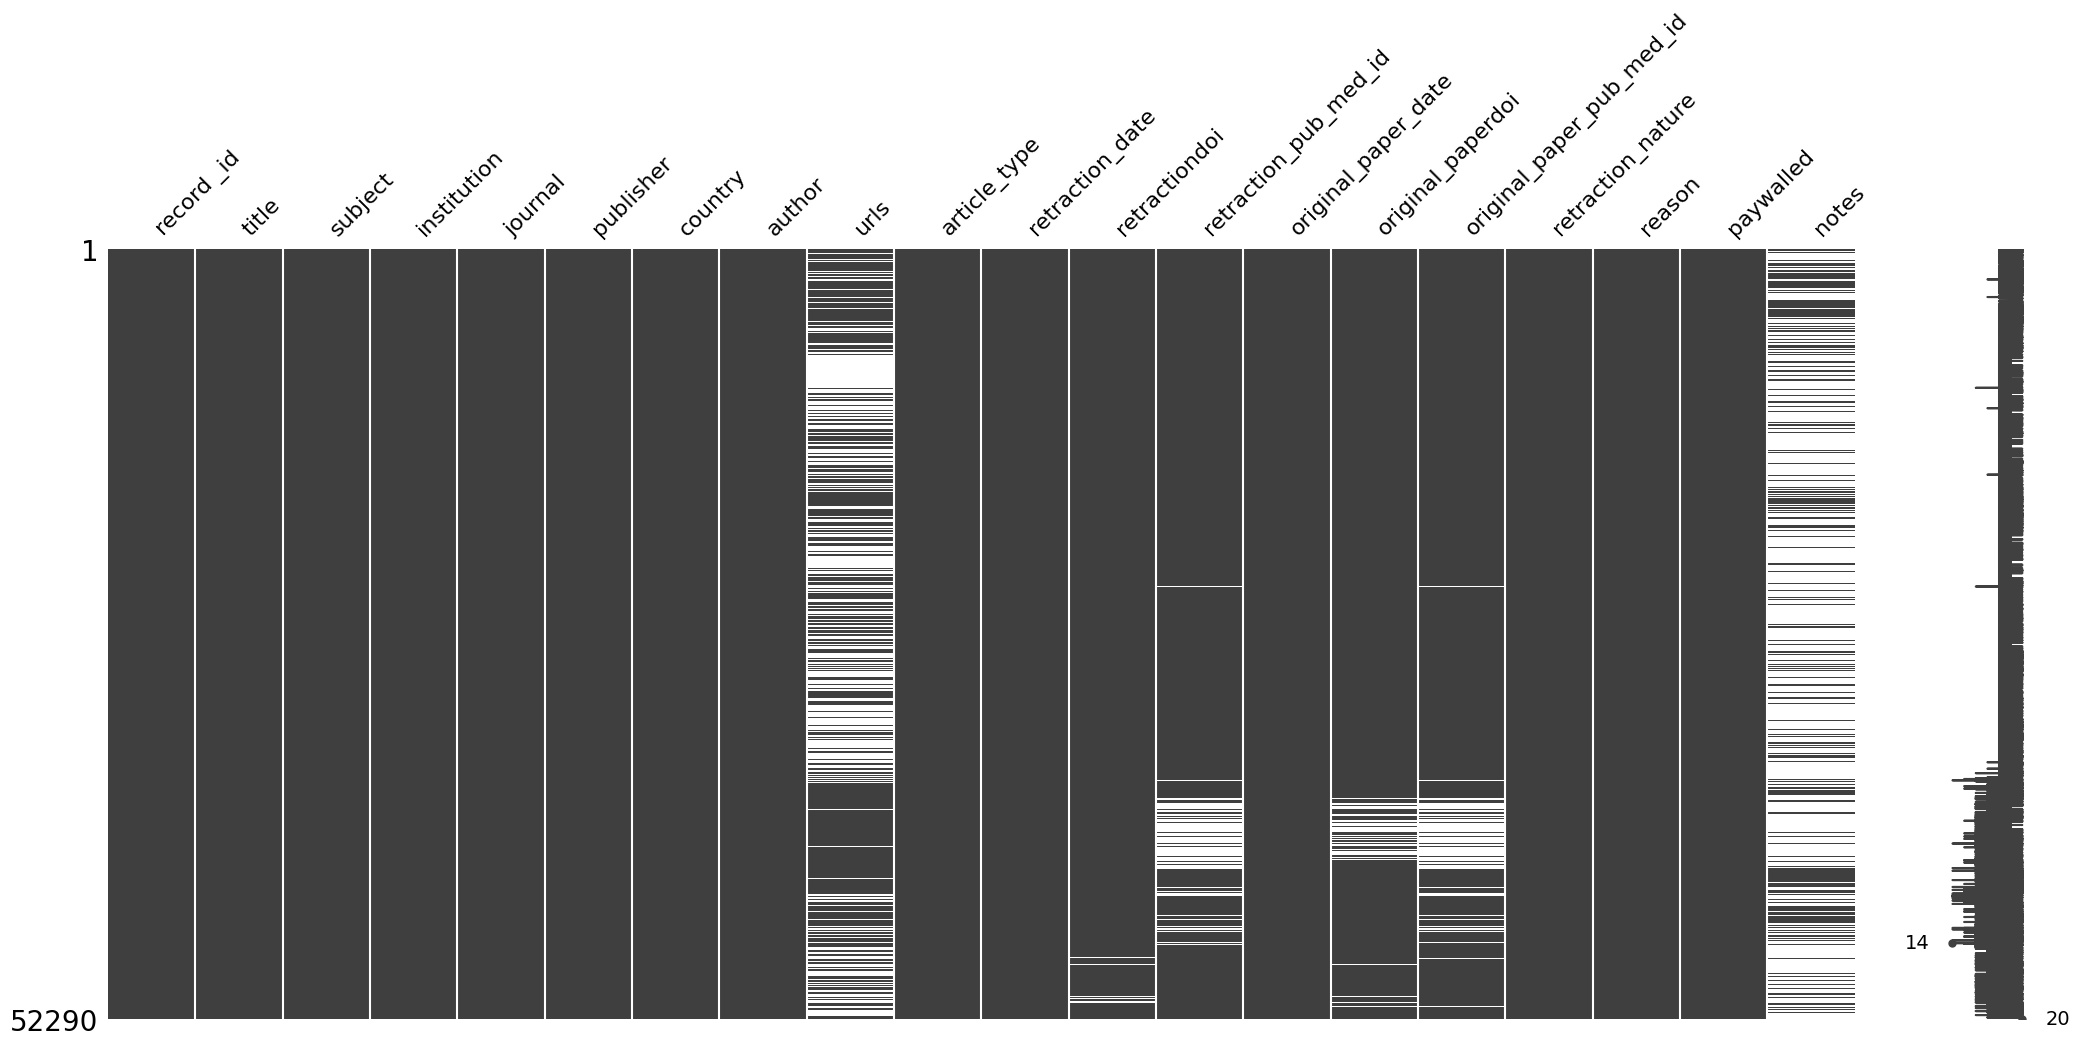

In [31]:

# Visualize NaNs per column using bars

msno.bar(df)

# Visualize NaNs per column using matrix

msno.matrix(df)

# Analyzing the Reasons for Retraction

One of the columns in our data set ("Reasons"), tells us about the reasons why each paper was retraced. Let's see the kind of information that we can find in this column:

- First let's try to visualize the unique entries in the column:

In [6]:

# Visualize number of unique values in Reason column

df.Reason.nunique()

8103

In [8]:

# Visualize the unique values themselves

df.Reason.unique()

array(['+Error in Text;+Updated to Retraction;',
       '+Concerns/Issues about Referencing/Attributions;+Concerns/Issues with Peer Review;+Investigation by Journal/Publisher;+Rogue Editor;+Unreliable Results;',
       '+Concerns/Issues about Referencing/Attributions;+Concerns/Issues with Peer Review;+Investigation by Journal/Publisher;+Objections by Author(s);+Rogue Editor;+Unreliable Results;',
       ...,
       '+Falsification/Fabrication of Data;+Investigation by Company/Institution;+Investigation by Third Party;+Misconduct - Official Investigation/Finding;+Misconduct by Author;+Notice - Unable to Access via current resources;',
       '+Duplication of Image;+Investigation by Company/Institution;+Manipulation of Images;+Misconduct - Official Investigation/Finding;+Misconduct by Author;+Upgrade/Update of Prior Notice;',
       '+Investigation by Third Party;+Withdrawal;'], dtype=object)

In [25]:
pip install levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 8.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [32]:
import Levenshtein as lev


# find similar reasons based on Levenshtein distance
def find_similar_reasons(df, column, threshold=5):
    reasons = df[column].unique()
    similar_pairs = []
    for i, reason1 in enumerate(reasons):
        for reason2 in reasons[i + 1:]:
            if lev.distance(reason1.lower(), reason2.lower()) <= threshold:
                similar_pairs.append((reason1, reason2))
    return similar_pairs

# Find similar reasons with a threshold
similar_reasons = find_similar_reasons(df, 'reason', threshold=5)
print(similar_reasons)


[('+Error in Text;+Updated to Retraction;', '+Error in Text;+Updated to Correction;'), ('+Error in Text;+Updated to Retraction;', '+Error in Image;+Updated to Retraction;'), ('+Error in Text;+Updated to Retraction;', '+Error in Data;+Updated to Retraction;'), ('+Euphemisms for Plagiarism;+Plagiarism of Text;', '+Euphemisms for Plagiarism;+Plagiarism of Image;'), ('+Euphemisms for Plagiarism;+Plagiarism of Text;', '+Euphemisms for Plagiarism;+Plagiarism of Data;'), ('+Concerns/Issues About Data;', '+Concerns/Issues About Image;'), ('+Concerns/Issues About Image;+Duplication of Image;+Investigation by Journal/Publisher;', '+Concerns/Issues About Data;+Duplication of Image;+Investigation by Journal/Publisher;'), ('+Concerns/Issues About Data;+Duplication of Image;+Euphemisms for Duplication;+Investigation by Company/Institution;+Unreliable Results;', '+Concerns/Issues About Image;+Duplication of Image;+Euphemisms for Duplication;+Investigation by Company/Institution;+Unreliable Results;')

In [34]:
duplicates = df['reason'].duplicated(keep=False)
# Count the duplicate reason 
duplicate_counts = df[duplicates]['reason'].value_counts()

# convert the column to lowercase first
duplicates_case_insensitive = df['reason'].str.lower().duplicated(keep=False)
duplicate_counts_case_insensitive = df[duplicates_case_insensitive]['reason'].str.lower().value_counts()


print("Case Sensitive Duplicates and their Counts:")
print(duplicate_counts)
print("\nCase Insensitive Duplicates and their Counts:")
print(duplicate_counts_case_insensitive)

Case Sensitive Duplicates and their Counts:
reason
+Notice - Limited or No Information;                                                                                                                                                                                           3625
+Breach of Policy by Author;+Date of Retraction/Other Unknown;+Notice - Limited or No Information;                                                                                                                             3352
+Duplication of Article;                                                                                                                                                                                                       1936
+Concerns/Issues About Data;+Concerns/Issues about Referencing/Attributions;+Concerns/Issues with Peer Review;+Investigation by Journal/Publisher;+Investigation by Third Party;+Unreliable Results;                           1282
+Notice - Limited or No Information;+

In [38]:
df.retraction_nature.unique()

array(['Correction', 'Retraction', 'Expression of concern',
       'Reinstatement'], dtype=object)

-----------------------------

As we can see, each "unique" entry in the "Reason" column can contain more than one actual reason for retraction, the different reasons being separated by semicolon ";". So we need to do some data cleaning to find out how many individual reasons we really have in our data frame. Let's do just that:

- First I'm going to create a list with the supposedly unique values of the "Reason" column (which as we saw are really just different combinations of some more basic, individual reasons separated by semicolons)

In [8]:

# Create list with unique values of Reason column

reasons = []
reasons = df.Reason.unique()

# Make sure list has desired type

reasons = reasons.tolist()

# Make sure it worked

type(reasons)


list

- Next I'm creating a function to break down each string of reasons in the "Reasons" column into their individual constituents:

In [9]:

# Define separator function

def separator(big_strings_list, shift=0):

    """Function takes a list of strings as input. If a given string contains a 
    semicolon, then it breaks into two different strings recursively until no 
    more strings divided by semicolons remain. It then returns a list of strings with all the 
    individual, separated strings. Sometimes the individual strings will start with
    a number of additional characters. The shift parameter controls this, set it to 
    be equal the number of characters before each string to exclude those from the outpout list"""
    
    small_strings_list = []
    for big_string in big_strings_list:
        if ";" in big_string:
            index = big_string.find(";")
            small_strings_list.append(big_string[shift:index])
            remainder = big_string[index + 1:]  # +1 to exclude the semicolon
            if len(remainder) > 1:
                small_strings_list.extend(separator([remainder], shift))
        else:
            small_strings_list.append(big_string[shift:])
    return small_strings_list

                

- Next I'm calling the function to obtain a list of individual reasons:

In [10]:

# Call separator function and store individual reasons in new list

individual_reasons = separator(reasons, 1)

In [11]:

# Visualize result

individual_reasons

['Error in Text',
 'Updated to Retraction',
 'Concerns/Issues about Referencing/Attributions',
 'Concerns/Issues with Peer Review',
 'Investigation by Journal/Publisher',
 'Rogue Editor',
 'Unreliable Results',
 'Concerns/Issues about Referencing/Attributions',
 'Concerns/Issues with Peer Review',
 'Investigation by Journal/Publisher',
 'Objections by Author(s)',
 'Rogue Editor',
 'Unreliable Results',
 'Concerns/Issues about Referencing/Attributions',
 'Concerns/Issues with Peer Review',
 'Investigation by Journal/Publisher',
 'Rogue Editor',
 'Unreliable Results',
 'Upgrade/Update of Prior Notice',
 'Euphemisms for Plagiarism',
 'Plagiarism of Text',
 'Concerns/Issues About Image',
 'Concerns/Issues about Human Subject Welfare',
 'Concerns/Issues about Referencing/Attributions',
 'Investigation by Journal/Publisher',
 'Paper Mill',
 'Unreliable Results',
 'Concerns/Issues About Image',
 'Concerns/Issues about Animal Welfare',
 'Concerns/Issues about Referencing/Attributions',
 'Inves

- There are still repeated entries in our list of individual reasons for rejection (as the same basic reasons for rejection were used in different combinations for different papers).
So we create a function that gets rid of duplicates and use it:

In [12]:

# Define function to get rid of duplicate reasons

def duplicate_eraser(list_with_duplicates):
    aux_set = set(list_with_duplicates)
    list_without_duplicates = list(aux_set)
        
    return list_without_duplicates

In [13]:

# Call function and store unique, non repeated reasons in list

unique_reasons = duplicate_eraser(individual_reasons)

- We finally have the desired list of individual reasons for paper retraction, without duplicates:

In [14]:

# Order the reasons list alphabetically

unique_reasons.sort()

# Obtain count of unique, non-repeated reasons

len(unique_reasons)

109

In [15]:

# Visualize unique, non-repeated reasons

unique_reasons

['Author Unresponsive',
 'Bias Issues or Lack of Balance',
 'Breach of Policy by Author',
 'Cites Retracted Work',
 'Civil Proceedings',
 'Complaints about Author',
 'Complaints about Company/Institution',
 'Complaints about Third Party',
 'Concerns/Issues About Authorship',
 'Concerns/Issues About Data',
 'Concerns/Issues About Image',
 'Concerns/Issues About Results',
 'Concerns/Issues about Animal Welfare',
 'Concerns/Issues about Human Subject Welfare',
 'Concerns/Issues about Referencing/Attributions',
 'Concerns/Issues about Third Party Involvement',
 'Concerns/Issues with Peer Review',
 'Conflict of Interest',
 'Contamination of Cell Lines/Tissues',
 'Contamination of Materials (General)',
 'Contamination of Reagents',
 'Copyright Claims',
 'Criminal Proceedings',
 'Date of Retraction/Other Unknown',
 'Doing the Right Thing',
 'Duplicate Publication through Error by Journal/Publisher',
 'Duplication of Article',
 'Duplication of Data',
 'Duplication of Image',
 'Duplication of T

Note that most of the reasons seem related to fraud, and that one of the reasons for retraction actually concerns the citing of retracted work.

## Analyzing the Subject Column

- Similarly, the subject column often includes more than one single keywork (as scientific articles can belong to more than one field):

In [16]:
df.Subject

0                     (B/T) Data Science;(B/T) Technology;
1        (B/T) Data Science;(B/T) Technology;(PHY) Engi...
2                                        (B/T) Technology;
3        (B/T) Technology;(HSC) Medicine - General;(HSC...
4                        (B/T) Technology;(SOC) Education;
                               ...                        
52285    (BLS) Biochemistry;(HSC) Medicine - Cardiology...
52286    (BLS) Biology - Cellular;(BLS) Genetics;(BLS) ...
52287    (BLS) Biology - Cellular;(BLS) Genetics;(BLS) ...
52288    (BLS) Biology - Cancer;(BLS) Biology - Cellula...
52289    (BLS) Biology - Cellular;(BLS) Biology - Molec...
Name: Subject, Length: 52290, dtype: object

- Just like in the Reason column, the separator used to list multiple topics together is a semicolon. So I can simply re-use the functions I used above to create a list of all the individual subjects that appear in the column without repetition:

In [19]:

# Create a list with all the rows in the "Subject" column

subjects_list = df.Subject

# Call the separator function to obtain a list of all the individual subjects

# Note that the subjects don't start with a "+" sign that we need to get rid of,
# so the shift parameters in this case is 0

individual_subjects = separator(subjects_list, 0)

# Call duplicate_eraser function to get rid of repeated subjects

unique_subjects = duplicate_eraser(individual_subjects)

# Order list of sujbects alphabetically

unique_subjects.sort()


- We can now visualize the total number of individual subjects, and the subjects themselves:

In [20]:
len(unique_subjects)

130

In [21]:
unique_subjects

['(B/T) Business - Accounting',
 '(B/T) Business - Economics',
 '(B/T) Business - General',
 '(B/T) Business - Management',
 '(B/T) Business - Manufacturing',
 '(B/T) Business - Marketing',
 '(B/T) Business - Public Relations',
 '(B/T) Computer Science',
 '(B/T) Data Science',
 '(B/T) Foreign Aid',
 '(B/T) Government',
 '(B/T) International Relations',
 '(B/T) Technology',
 '(B/T) Transportation',
 '(B/T) Urban Planning',
 '(BLS) Agriculture',
 '(BLS) Anatomy/Physiology',
 '(BLS) Anthropology',
 '(BLS) Archeology',
 '(BLS) Biochemistry',
 '(BLS) Biology - Cancer',
 '(BLS) Biology - Cellular',
 '(BLS) Biology - General',
 '(BLS) Biology - Molecular',
 '(BLS) Forensic Sciences',
 '(BLS) Genetics',
 '(BLS) Microbiology',
 '(BLS) Neuroscience',
 '(BLS) Nutrition',
 '(BLS) Paleontology',
 '(BLS) Parasitology',
 '(BLS) Plant Biology/Botany',
 '(BLS) Toxicology',
 '(BLS) Zoology',
 '(ENV) Climate Change',
 '(ENV) Climatology',
 '(ENV) Ecology',
 '(ENV) Environmental Sciences',
 '(ENV) Food Sc

## The Retraction Nature Column

In [26]:
df.RetractionNature.unique()

array(['Correction', 'Retraction', 'Expression of concern',
       'Reinstatement'], dtype=object)


## An Example of Fraudulent Work

- Next I'm going to obtain one example of fraudulent work to see if I can access the paper online:

In [ ]:

# Obtain one example of fraudulent work

example = df.iloc[95]

# Visualize information for example

example

Record ID                                                            52661
Title                    Study on inventions of fresh food in commercia...
Subject                  (B/T) Business - Economics;(B/T) Technology;(B...
Institution              School of Information Technology, ShangQiu Nor...
Journal                  Acta Agriculturae Scandinavica, Section B â ...
Publisher                                               Taylor and Francis
Country                                                              China
Author                                                           Wei Wenji
URLS                     https://retractionwatch.com/2024/01/30/journal...
ArticleType                                              Research Article;
RetractionDate                                              1/30/2024 0:00
RetractionDOI                                10.1080/09064710.2024.2304398
RetractionPubMedID                                                     0.0
OriginalPaperDate        


- I could use the DOI identifier to find the paper online. You can download it at (I also uploaded the .pdf to the repo): 

https://www.tandfonline.com/doi/abs/10.1080/09064710.2021.1880625


As you can see, the paper is in English and the full text .pdf displays the word "RETRACTED" in the backgound. This is just one example, but it shows that accessing the full text of the retracted work will be possible at least in some cases (and hopefully in most cases!).